# Stock Price Prediction Using RNN and LSTM

## `Introduction`

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market. In this work, we present a recurrent neural network (RNN) and Long Short-Term Memory (LSTM) approach to predict stock market indices.
We will be using the [Gooogle Stock Price](https://www.kaggle.com/rahulsah06/gooogle-stock-price) database.



For each record in the dataset it is provided: 

- Date
- Open
- High
- Low
- Close

## `Plan for data exploration`
1. Exploring data 
    * Examine the data types and value_counts
2. feature engineering 
    * removing unimportant data if found 
    * dealing with missing (NaN) values if found
    * feature scalling for continuous variables if needed
3. Spliting the Data
    * train and test splits and creating a function to get X,y
4. Training models
    * RNN
    * LSTM
6. Next steps

# Exploring and feature engineering

In [1]:
# importing
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('data/Google_Stock_Price_Train.csv',sep=",")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df.dtypes.value_counts()

object     3
float64    3
dtype: int64

In [4]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

we will Replace comma in Close column and convert values into float64
and Transform Date column into a datetime object

In [5]:
df['Close'] = df['Close'].apply(lambda x : str(x).replace(',', '')).astype('float')
df['Close'] = df['Close'].apply(lambda x : str(x).replace(',', '')).astype('float')

In [6]:
df['Date'] = pd.to_datetime(df.Date)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


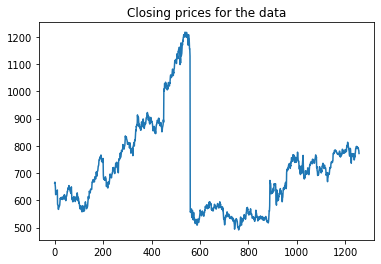

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['Close']);
plt.title("Closing prices for the data");

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Split the Data and Apply Feature Scaling


In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range= (0,1))
closing = df['Close'] = sc.fit_transform(np.array(df['Close']).reshape(-1,1))

In [11]:
def create_dataset(data, time_step=1):
    x_data, y_data = [], []
    
    for i in range(len(data)-time_step-1):
        x_data.append(data[i:(i+time_step), 0])
        y_data.append(data[i + time_step, 0])
    return np.array(x_data), np.array(y_data)

In [12]:
training_size=int(len(closing)*0.65)
test_size=len(closing)-training_size
train_data,test_data=closing[0:training_size,:],closing[training_size:len(closing),:1]

In [13]:
# Taking Past 50 days data
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)

In [14]:
time_step = 50
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
print('Training input shape: {}'.format(X_train.shape))
print('Training output shape: {}'.format(y_train.shape))

Training input shape: (766, 50, 1)
Training output shape: (766,)


In [17]:
print('Testing input shape: {}'.format(X_test.shape))
print('Testing output shape: {}'.format(y_test.shape))

Testing input shape: (390, 50, 1)
Testing output shape: (390,)


# Train models
* Simple RNN layers each with 50 hidden units and tanh activation function per cell
* LSTM with 70 hidden units per cell
* Define the loss function and optimizer strategy
* Fit the model with 100 epochs
* Predict and plot the results

In [18]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

model = Sequential() 

### `RNN`

In [19]:
model.add(SimpleRNN(50, activation='tanh',
                    input_shape=(X_train.shape[1],1), return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences = True,))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences = True,))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh'))
# output layer to make final predictions 
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

In [21]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test.reshape(-1, 1))

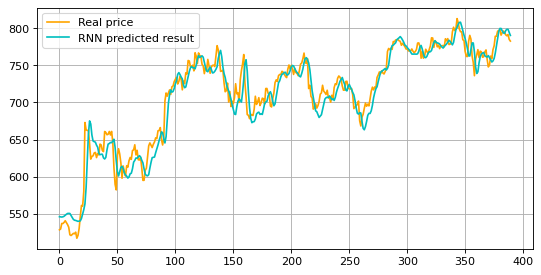

In [22]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_test,color="orange",label="Real price")
plt.plot(y_pred,color="c",label="RNN predicted result")
plt.legend()
plt.grid(True)
plt.show()

### `LSTM`

In [23]:
model2 = Sequential() 
model2.add(LSTM(70, input_shape=(X_train.shape[1],1)))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70)                20160     
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                                 
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


In [25]:
y_pred2 = model2.predict(X_test)
y_pred2 = sc.inverse_transform(y_pred2)

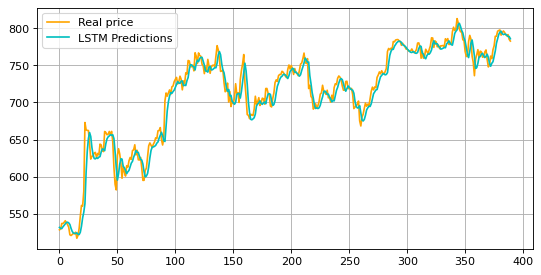

In [26]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_test,color="orange",label="Real price")
plt.plot(y_pred2,color="c",label="LSTM Predictions")
plt.legend()
plt.grid(True)
plt.show()

# Selecting the best model

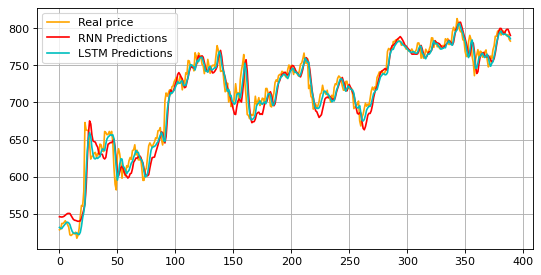

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_test,color="orange",label="Real price")
plt.plot(y_pred,color="r",label="RNN Predictions")
plt.plot(y_pred2,color="c",label="LSTM Predictions")
plt.legend()
plt.grid(True)
plt.show()

If we compare the model summary for Simple RNN with the model summary for LSTM, we can see that there are more trainable parameters for the LSTM, which explains why it took a longer time to train this model.

### Overall the plots show that our LSTM model with a less complex structure still performed better than our Simple RNN.

# Next Steps

To improve the quality of forecasts over many time steps, we'd need to use more data and more sophisticated LSTM model structures. We could try training with more data or increasing cell_units and running more training epochs.